# __Feature Engineering__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:
- Introduction to Feature Engineering
- Feature Engineering Methods
- Transforming Variables
  * Log Transformation
  * Square Root Transformation
  * Box-Cox Transformation
- Features Scaling
- Label Encoding
- One Hot Encoding
- Hashing
    * Hashlib Module
- Grouping Operations

## __1. Introduction to Feature Engineering__
It refers to the process of selecting, modifying, or creating new features (variables) from the raw data to improve the performance of machine learning models.
- It involves transforming the data into a more suitable format, making it easier for models to learn patterns and make accurate predictions.
- It is a critical step in the data preprocessing pipeline and plays a key role in the success of machine learning projects.



## __2. Feature Engineering Methods__

They introduce the concept of creating new features through mathematical operations, transformations, or combining existing variables.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_10_Feature_Engineering/Feature_Engineering_Methods.png)

__Note:__ The __Data Wrangling__ lesson extensively addresses various feature engineering methods, including outlier handling, imputation, and data cleaning. Any aspects not covered in that lesson but deemed essential for feature engineering are comprehensively discussed here.

In [5]:
import pandas as pd
import numpy as np
df= pd.read_csv("../data/HousePrices.csv")

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
# Create a new feature 'total_rooms' by adding bedrooms and bathrooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_rooms
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,7.50
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5.25
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,6.50


## __3. Transforming Variables__
Transforming variables is a crucial aspect of feature engineering that involves modifying the scale, distribution, or nature of variables to meet certain assumptions or to make them more suitable for analysis or modeling.
- Here are a few common techniques for transforming variables:
1. Log transformation
2. Square root transformation
3. Box-cox transformation


### __3.1 Log Transformation__

Log transformation is useful for handling skewed data or reducing the impact of outliers. It applies the natural logarithm to the variable values and makes highly skewed distributions less skewed.

In [10]:
# Logarithmic transformation of the 'price' column
df['log_price'] = df['price'].apply(np.log)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_rooms,log_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50,12.653958
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,7.50,14.684290
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00,12.742566
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5.25,12.948010
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,6.50,13.217674


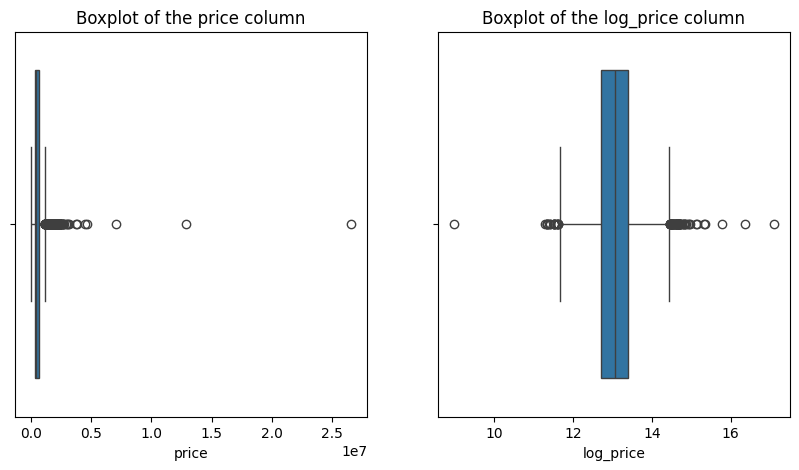

In [ ]:
# Create boxplot for the 'price' and 'log_price' columns
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='price', data=df, ax=ax[0])
sns.boxplot(x='log_price', data=df, ax=ax[1])
ax[0].set_title('Boxplot of the price column')
ax[1].set_title('Boxplot of the log_price column')
plt.show()

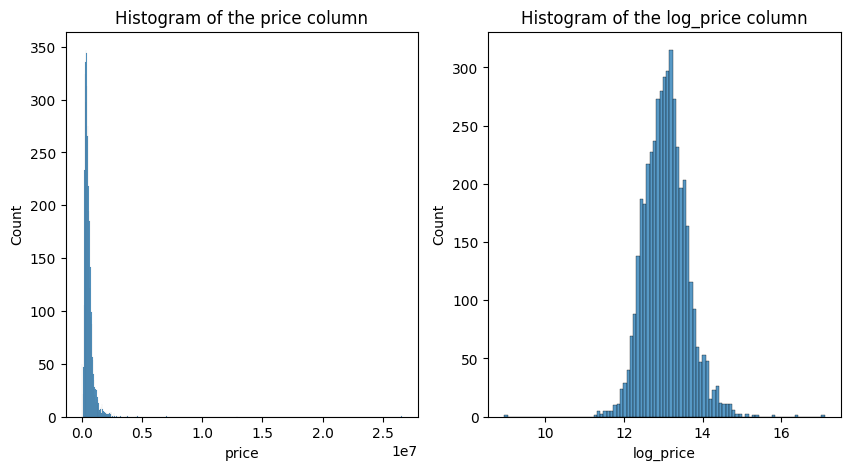

In [18]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(df['price'], ax=ax[0])
sns.histplot(df['log_price'], ax=ax[1])
sns.histplot(df['SquareRoot_price'], ax=ax[2])
ax[0].set_title('Histogram of the price column')
ax[1].set_title('Histogram of the log_price column')
ax[2].set_title('Histogram of the SquareRoot_price column')
plt.show()

### __3.2 Square Root Transformation__
Square root transformation, like log transformation, effectively stabilizes variance and addresses skewed distributions. Although it's gentler than log transformation, it achieves the same objective.

In [11]:
# Square root transforming the 'price' variable
df['SquareRoot_price'] = df['price'].apply(np.sqrt)
# Displaying the DataFrame with the new feature
print("DataFrame with square root transformed 'price':")
df[['price', 'SquareRoot_price']].head()

DataFrame with square root transformed 'price':


,price,SquareRoot_price
0,313000.0,559.464029
1,2384000.0,1544.020725
2,342000.0,584.807661
3,420000.0,648.074070
4,550000.0,741.619849


### __3.3 Box-Cox Transformation__

The box-cox transformation is a family of power transformations that includes log and square root transformations.
- It can handle a broader range of data distributions.

- Ensuring positive data is crucial for the Box-Cox transformation because it involves taking the logarithm, which is undefined for zero or negative values. Adding a constant helps avoid mathematical errors and ensures the transformation can be applied effectively.

In [13]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'sales' variable
df['BoxCox_sqft'], best_lambda = boxcox(df['sqft_living'])

# Displaying the DataFrame with the Box-Cox transformed 'sales' variable
print("DataFrame with box-cox transformed price:")
df[['sqft_living', 'BoxCox_sqft']].head()

DataFrame with box-cox transformed price:


,sqft_living,BoxCox_sqft
0,1340,8.270696
1,3650,9.609817
2,1930,8.752434
3,2000,8.799831
4,1940,8.759306


0.037642104833800136


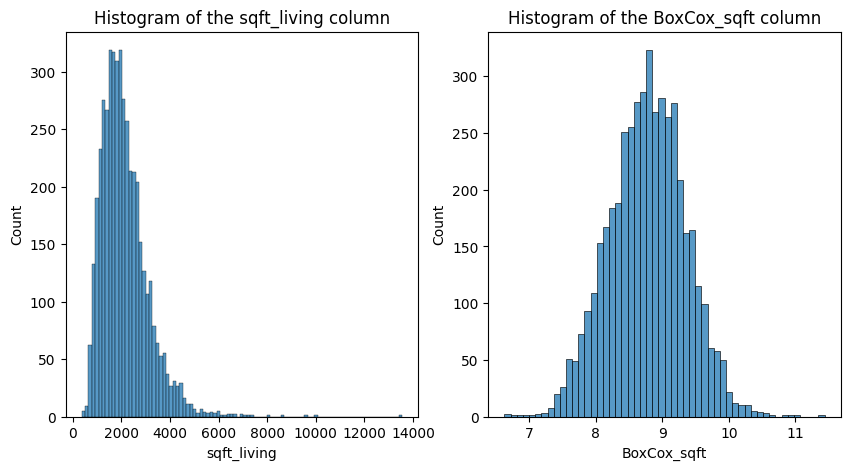

In [19]:
print(best_lambda)
# Create histogram for the 'sqft_living' and 'BoxCox_sqft' columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['sqft_living'], ax=ax[0])
sns.histplot(df['BoxCox_sqft'], ax=ax[1])
ax[0].set_title('Histogram of the sqft_living column')
ax[1].set_title('Histogram of the BoxCox_sqft column')
plt.show()

## __4. Feature Scaling__
Feature scaling is a technique used in machine learning and data preprocessing to standardize or normalize the range of independent variables or features of a dataset.

- Min-max scaling transforms data to a specific range, typically between 0 and 1, preserving the relative differences between values. This normalization technique is ideal for datasets with known bounds, ensuring that all values are rescaled proportionally to fit within the specified range.

- Standard scaling is preferable for normally distributed data to maintain mean-centeredness and consistent standard deviations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_10_Feature_Engineering/Label_Encoding.png)

In [ ]:
# Normalization using sickit-learn
from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df[['sqft_living', 'sqft_lot']] = #CODE HERE
df.head()

In [ ]:
# Standardization using sickit-learn
from sklearn.preprocessing import StandardScaler

# Scaling numeric features using min-max scaling
standard_sc = StandardScaler()
df[['sqft_living', 'sqft_lot']] = #CODE HERE
df.head()

## __5. Label Encoding__

Label encoding is a technique used to convert categorical labels into a numeric format, making it suitable for machine learning algorithms that require numerical input.
- In label encoding, each unique category is assigned an integer value.
- This is particularly useful when dealing with ordinal categorical data, where the order of categories matters.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {'size': ['small', 'medium', 'large', 'medium', 'small']}
df2 = pd.DataFrame(data)

# Before label encoding
print("Original DataFrame:")
df2.head()

In [ ]:
# Apply label encoding
label_encoder = LabelEncoder()
df2['size_encoded'] = #CODE HERE

# After label encoding
print("\nDataFrame after label encoding:")
df2.head()

In [ ]:
# Demonstrating label encoding using csv file
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'city' column
label_encoder = LabelEncoder()
df['city_encoded'] = #CODE HERE
df.head()

In [ ]:
# Other solution, without sickit-learn
df['city_encoded_v2'] = #CODE HERE
df.head()

In [ ]:
# Other solution, without sickit-learn
df['city_encoded_v2'] = #CODE HERE
df.head()

## __6. One-Hot Encoding__

One-hot encoding is a technique to represent categorical variables as binary vectors.
- It is particularly useful when dealing with nominal categorical data, where there is no inherent order among categories.
- In one-hot encoding, each unique category is transformed into a binary column, and only one column in each set of binary columns is _hot_ (or 1) to indicate the presence of that category.

- It increases dataset dimensionality, facilitating categorical data representation. However, it can lead to increased complexity and computational overhead.

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'color': ['red', 'blue', 'green', 'red', 'green']}
df3 = pd.DataFrame(data)

# Before one-hot encoding
print("Original DataFrame:")
df3

In [ ]:
# Apply one-hot encoding
df_encoded = #CODE HERE

# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
df_encoded

In [ ]:
# Demonstrating one-hot encoding using csv file
# One-Hot Encoding for the 'view' column
df_encode = #CODE HERE

# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
df_encode.head()

In [ ]:
# Same, using sickit-learn
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
tr = #CODE HERE
print(tr)

In [ ]:
print(enc.categories_)

In [ ]:
print(enc.categories_[0])

In [ ]:
tr.toarray()

In [ ]:
df_encode2= df.copy()
df_encode2[enc.categories_[0]] = tr.toarray()
df_encode2.head()

In [ ]:
df_encode2.shape

## __7. Hashing__

It is a technique to convert input data (of variable length) into a fixed-length string of characters, typically a hash code.
- The hash function takes an input (or message) and returns a fixed-size string of characters, which is typically a hexadecimal number.
- It is commonly used for indexing data structures, checking data integrity, and hashing passwords.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Updated_Images/Lesson_10/10_01/Lesson_10_Feature_EngineeringHashing.jpg)

In [ ]:
# Example of hashing in Python
data = "Hello, Hashing!"

# Using the hash() function
hash_value = hash(data)

print(f"Original data: {data}")
print(f"Hash value: {hash_value}")

In [ ]:
# Demonstrating hashing using csv file
# Hashing for the 'street' column
df['street_hashed'] = df['street'].apply(hash)
df.head(10)

### __7.1 Hashlib Module__

The hashlib module in Python is used for generating hash values. It offers interfaces to different cryptographic hash algorithms like MD5, SHA-1, SHA-256, SHA-384, and SHA-512.

- It enables the efficient use of hash functions, ensuring secure computations.
- It provides reliability for hash-related operations.
- It is widey used for cryptographic operations, data integrity, and password hashing.
- It ensures convenience and robustness.



Cryptographic hash algorithms vary in hash size and security levels.

- For tasks where security is not a critical concern, you can opt for MD5 or SHA-1. However, it's important to note that both algorithms are deprecated due to vulnerabilities.

- For security-sensitive applications, it's advisable to prioritize SHA-256, SHA-384, or SHA-512 due to their stronger security and larger hash sizes.

In [ ]:
# Example of hashlib module in Python
import hashlib

# Input data
data = b'Hello, world!'
print(f"Original data: {data.decode()} \n")

# Calculate MD5 hash
md5_hash = hashlib.md5(data).hexdigest()
print("MD5 Hash:", md5_hash)

# Calculate SHA-1 hash
sha1_hash = hashlib.sha1(data).hexdigest()
print("SHA-1 Hash:", sha1_hash)

# Calculate SHA-256 hash
sha256_hash = hashlib.sha256(data).hexdigest()
print("SHA-256 Hash:", sha256_hash)

# Calculate SHA-384 hash
sha384_hash = hashlib.sha384(data).hexdigest()
print("SHA-384 Hash:", sha384_hash)

# Calculate SHA-512 hash
sha512_hash = hashlib.sha512(data).hexdigest()
print("SHA-512 Hash:", sha512_hash)


In this example, the `hashlib` module is imported and input data is provided in bytes format. Hash values are then computed using the md5(), sha1(), sha256(), sha384(), and sha512() functions, and their hexadecimal representations are obtained using hexdigest().

In [ ]:
# Demonstrating MD5 hash function using csv file for the 'street' column

street_column = df['street']
hashed_streets = street_column.apply(lambda x: hashlib.md5(x.encode()).hexdigest())

# Replace the original street values with hash values
df['hashed_street'] = hashed_streets

# Optionally, write the updated DataFrame back to a CSV file
df.to_csv('hashed_file.csv', index=False)

df

## __8. Grouping Operations__

Grouping operations involve splitting a dataset into groups based on some criteria, applying a function to each group independently, and then combining the results.
- This is a crucial step in data analysis and manipulation, allowing for insights into the data at a more granular level.
- Grouping operations are commonly combined with aggregate functions to summarize data within each group.

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
        'Revenue': [500, 300, 700, 400, 600]}

df4 = pd.DataFrame(data)
df4

In [ ]:
# Grouping by 'Category' and calculating total revenue for each category
grouped_df = #CODE HERE

print("\nGrouped DataFrame with total revenue:")
grouped_df

In [ ]:
# Grouping by 'city' and calculating the average price
df_grouped = #CODE HERE
df_grouped.head()

In [ ]:
# Grouping by 'city' and calculating the average price
df_grouped = #CODE HERE
df_grouped.head()

In [ ]:
# Grouping by 'city' and calculating the minimum price
df_grouped = #CODE HERE
df_grouped.head()

## __9. Removing highly correlated features__

In [ ]:
df= pd.read_csv("HousePrices.csv")
df.head()

In [ ]:
# Create a dataframe wit hall columns except "price" (because we don't want to remove it)
import pandas as pd
import numpy as np
df_features = df.copy()
#CODE HERE
df_features.head()

In [ ]:
# Compute correlation
df_corr = #CODE HERE

/tmp/ipykernel_76/352822016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_features.corr()


In [ ]:
df_corr.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("Heat map of the correlation matrix")
plt.show()

In [ ]:
df_corr.columns

In [ ]:
df_corr.iloc[0,1]

In [ ]:
(df_corr.iloc[2,3:]>0.5).sum()

In [ ]:
cols = df_corr.columns
cols_after_corr = list(cols)

for i in range(df_corr.shape[0]):
    #print(i)
    if ((df_corr.iloc[i,i+1:]>0.5).sum()>0.1):
        cols_after_corr.remove(cols[i])
        print("Removing",cols[i])

print(len(cols_after_corr))
cols_after_corr

In [ ]:
df_features_after_corr = df_features[cols_after_corr]
df_features_after_corr.head()

In [ ]:
df_features_after_corr.shape

In [ ]:
df_corr = df_features_after_corr.corr()

In [ ]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("Heat map of the correlation matrix")
plt.show()

# __Assisted Practice__

## __Problem Statement:__
A botanical research team is conducting a comprehensive analysis of iris flowers, aiming to derive valuable insights from their characteristics. The team wants to explore feature engineering techniques to understand and visualize the relationships within the Iris dataset.

## __Steps to Perform:__
- Understand the Dataset: Get familiar with the Iris dataset and its features
- Engineer Features: Create new features like sepal area and petal area
- Transform Variables: If the features are not normally distributed, apply transformations
- Scale Features: Use Min-Max Scaling or standard scaling to scale the features
- Encode Labels: Convert the categorical data (species) into numerical data using label encoding
- One Hot Encoding: Apply one hot encoding on the species feature and compare with label encoding